# Linear regression using `statsmodels`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

sns.set(rc={
    'figure.figsize': (8, 6),
    'font.size': 14
})

/data/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Read in the British Crime Survey 2007-2008 dataset.

In [2]:
bcs = pd.read_csv('https://github.com/estimand/teaching-datasets/raw/master/british-crime-survey/bcs.csv')

In [3]:
bcs.head()

,case_id,sex,age,marital_status,ethnic_origin,education,paid_work_last_wk,years_in_area,same_address_last_year,tenure,...,worry_rape,worry_assault,worry_insult,worry_racism,crime_change_two_yrs,personal_crime,property_crime,antisocial_behaviour,nuisance_neighbours,victim_last_yr
0,61302140,F,36.0,Married,White,None,True,"[10, 20)",NaN,Buying with mortgage/loan,...,Not very worried,Not very worried,Fairly worried,Not very worried,A little more crime,NaN,NaN,1.117700,2.212788,False
1,61384060,M,44.0,Separated,White,Apprenticeship or A/AS Level,True,"[0, 1)",False,Rent,...,Not at all worried,Not very worried,Not very worried,Not very worried,NaN,-0.389274,2.139811,1.791787,-1.024336,False
2,63684260,M,43.0,Married,White,O Level / GCSE,True,"[2, 3)",NaN,Buying with mortgage/loan,...,Not at all worried,Not very worried,Not very worried,Not very worried,NaN,-0.320777,0.506092,NaN,NaN,True
3,63790220,F,27.0,Single,Black or Black British,Apprenticeship or A/AS Level,True,"[0, 1)",False,Rent,...,Fairly worried,Fairly worried,Not very worried,Not very worried,NaN,0.464605,1.602307,0.462970,0.822929,True
4,63843180,M,38.0,Married,White,Degree or Diploma,True,"[10, 20)",NaN,Buying with mortgage/loan,...,Not at all worried,Not very worried,Not very worried,Not very worried,A lot more crime,-0.117556,-0.657555,0.137419,-0.780199,True


Define predictors and response.

In [4]:
predictors = ['sex', 'age', 'marital_status', 'ethnic_origin', 'education', 'victim_last_yr']
response = 'personal_crime'
all_vars = predictors + [response]

Remove missing values.

In [5]:
bcs.dropna(subset=all_vars, inplace=True)

## EDA

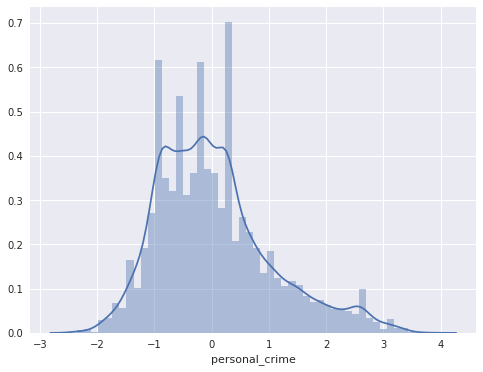

In [6]:
sns.distplot(bcs['personal_crime'])

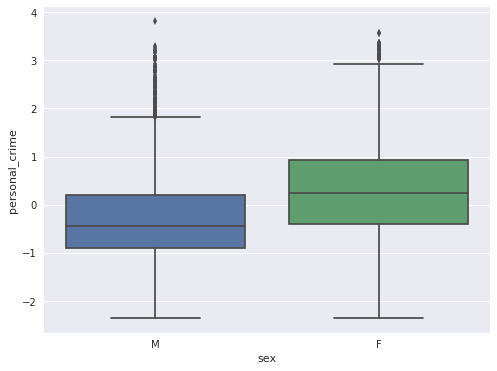

In [7]:
sns.boxplot(x='sex', y='personal_crime', data=bcs)

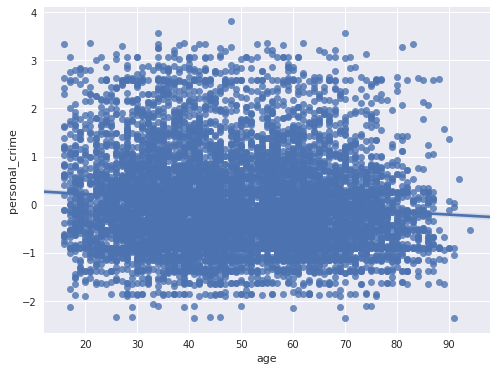

In [8]:
sns.regplot(x='age', y='personal_crime', data=bcs)

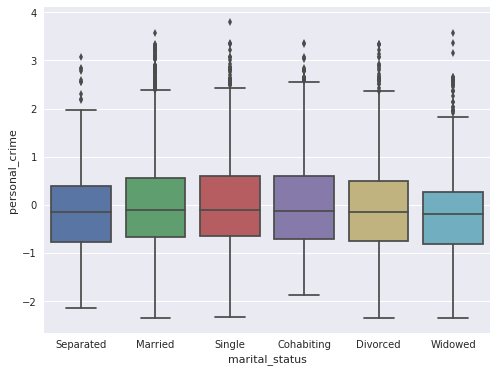

In [9]:
sns.boxplot(x='marital_status', y='personal_crime', data=bcs)

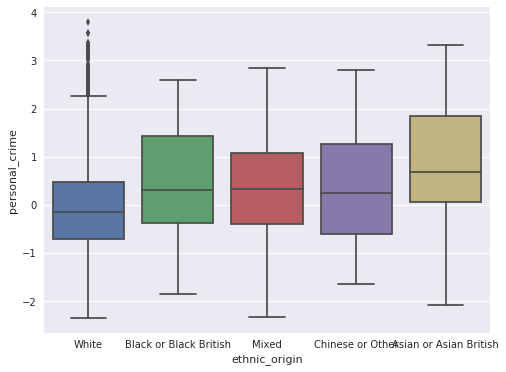

In [10]:
sns.boxplot(x='ethnic_origin', y='personal_crime', data=bcs)

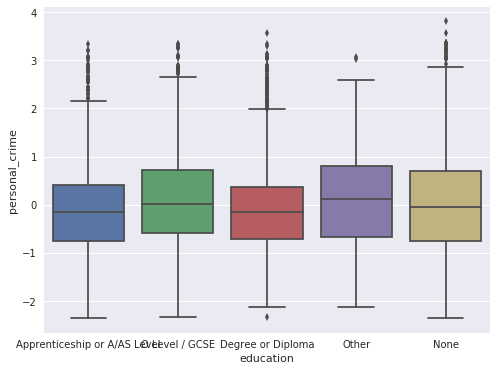

In [11]:
sns.boxplot(x='education', y='personal_crime', data=bcs)

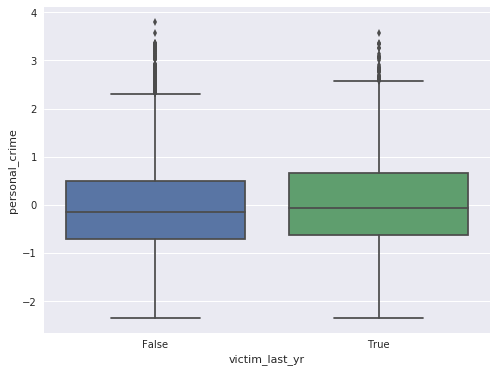

In [12]:
sns.boxplot(x='victim_last_yr', y='personal_crime', data=bcs)

## Linear regression

In [13]:
model = smf.glm(
    'personal_crime ~ sex + age + marital_status + ethnic_origin + education + victim_last_yr',
    data=bcs
).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         personal_crime   No. Observations:                 8382
Model:                            GLM   Df Residuals:                     8365
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                  0.871317891544
Method:                          IRLS   Log-Likelihood:                -11308.
Date:                Sun, 03 Dec 2017   Deviance:                       7288.6
Time:                        13:23:26   Pearson chi2:                 7.29e+03
No. Iterations:                     2                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   1.3489      0.074     18.268      0.000       1.204       1.494
sex[T.M]                                   -0.5923      0.021    -28.404      0.000      -0.633      -0.551
marital_status[T.Divorced]                 -0.0175      0.049     -0.357      0.721      -0.114       0.079
marital_status[T.Married]                   0.0445      0.036      1.226      0.220      -0.027       0.116
marital_status[T.Separated]                -0.1315      0.072     -1.826      0.068      -0.273       0.010
marital_status[T.Single]                    0.0063      0.041      0.154      0.878      -0.074       0.087
marital_status[T.Widowed]                  -0.0542      0.057     -0.951      0.341      -0.166       0.057
ethnic_origin[T.Black or Black British]    -0.3872      0.103     -3.759      0.000      -0.589      -0.185
ethnic_origin[T.Chinese or Other]          -0.5337      0.112     -4.756      0.000      -0.754      -0.314
ethnic_origin[T.Mixed]                     -0.4796      0.170     -2.826      0.005      -0.812      -0.147
ethnic_origin[T.White]                     -0.8565      0.058    -14.882      0.000      -0.969      -0.744
education[T.Degree or Diploma]             -0.1315      0.029     -4.459      0.000      -0.189      -0.074
education[T.None]                           0.1455      0.034      4.309      0.000       0.079       0.212
education[T.O Level / GCSE]                 0.0508      0.033      1.545      0.122      -0.014       0.115
education[T.Other]                          0.1728      0.057      3.022      0.003       0.061       0.285
victim_last_yr[T.True]                      0.0632      0.025      2.479      0.013       0.013       0.113
age                                        -0.0050      0.001     -6.206      0.000      -0.007      -0.003
===========================================================================================================
"""

## Diagnostics

Predicted versus observed:

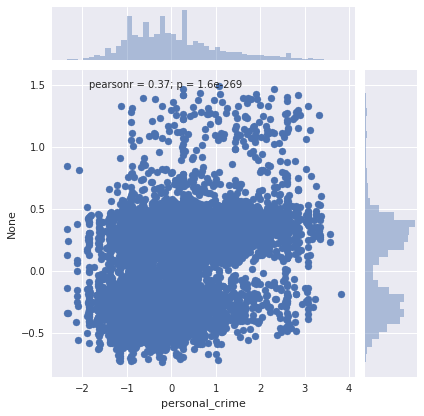

In [15]:
sns.jointplot(bcs[response], model.fittedvalues)

Residuals versus predicted:

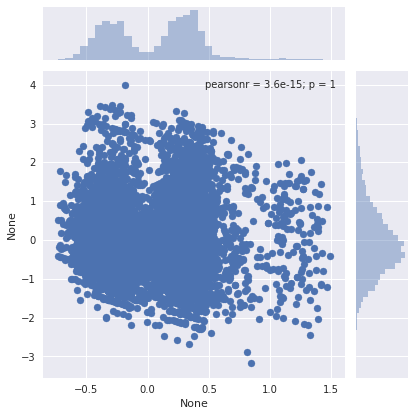

In [16]:
sns.jointplot(model.fittedvalues, model.resid_response)

Residuals versus `age` (predictor):

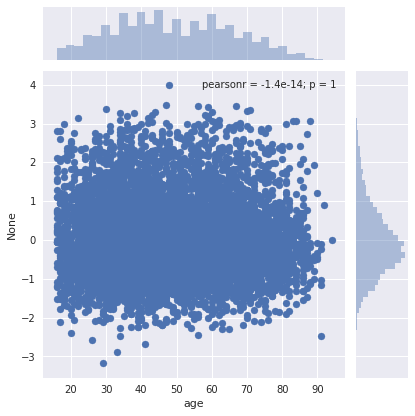

In [17]:
sns.jointplot(bcs['age'], model.resid_response)

Autocorrelation plot (most useful for time series):

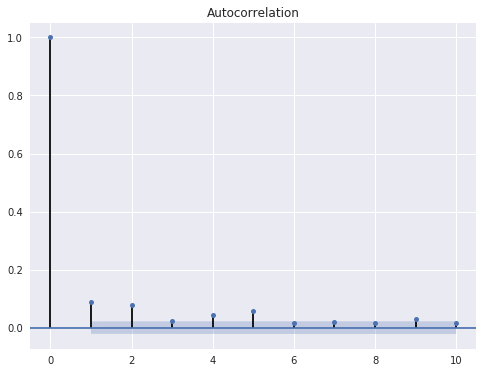

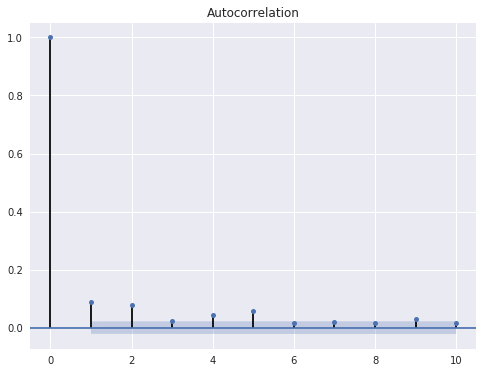

In [18]:
plot_acf(model.resid_response, lags=10)

Normal Q-Q plot for residuals:

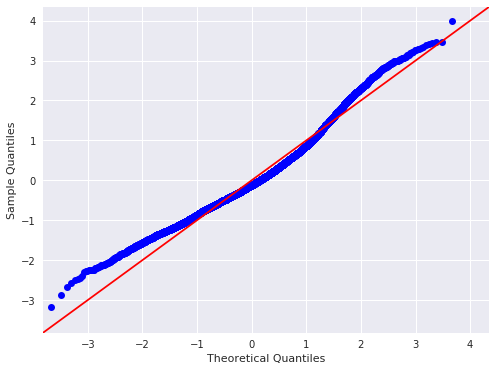

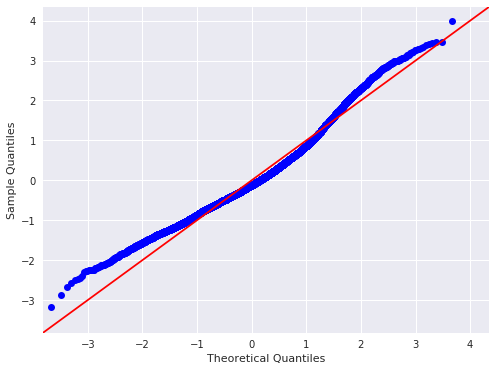

In [19]:
qqplot(model.resid_response, line='45')